# Stock prediction project

Dans ce notebook, je vais vous présenter mes recherches sur la prédiction boursière.

J'ai commencé par créer un petit programme en python utilisant l'api de coinbasepro pour récupérer les valeurs du bitcoin ainsi que l'orderbook de la plateforme sur des intervalles de temps courtes.
J'ai ainsi, lancé 5 fois mon programme sur 10 000 intervalles, chacune espacé de 5 secondes, ce qui me fait 5 datasets de 14h consécutives.

Voici à quoi ressemble une intervalle de l'une de mes datasets, qui sont stockées en Json.

In [7]:
import sys
import json

with open('dataset/dataset_1.txt', 'r') as myfile:
    data = myfile.read()
    dataset1 = json.loads(data)
with open('dataset/dataset_2.txt', 'r') as myfile:
    data = myfile.read()
    dataset2 = json.loads(data)
with open('dataset/dataset_3.txt', 'r') as myfile:
    data = myfile.read()
    dataset3 = json.loads(data)
with open('dataset/dataset_4.txt', 'r') as myfile:
    data = myfile.read()
    dataset4 = json.loads(data)
with open('dataset/dataset_5.txt', 'r') as myfile:
    data = myfile.read()
    dataset5 = json.loads(data)

print(json.dumps(dataset1[0], indent=2))

{
  "timestamp": {
    "iso": "2019-02-07T11:35:39.743Z",
    "epoch": 1549539339.743
  },
  "price": 2982.875,
  "orderbook": {
    "bids": [
      [
        "2982.87",
        "0.3745844",
        1
      ],
      [
        "2982.72",
        "0.02",
        1
      ],
      [
        "2982.03",
        "1.09139275",
        1
      ],
      [
        "2981.71",
        "0.091",
        2
      ],
      [
        "2981.7",
        "0.11319179",
        2
      ],
      [
        "2981.3",
        "0.06338",
        1
      ],
      [
        "2981.09",
        "0.02292786",
        1
      ],
      [
        "2980.99",
        "0.33689786",
        1
      ],
      [
        "2980.74",
        "11.999",
        1
      ],
      [
        "2980.73",
        "1.5",
        1
      ],
      [
        "2980.58",
        "0.00365887",
        2
      ],
      [
        "2980.01",
        "1.0788",
        1
      ],
      [
        "2980",
        "1.70446266",
        4
      ],
      [


Chaque intervalle contient donc son timestamp, le prix du bitcoin à ce moment et l'orderbook.

Maintenant regardons plus en détails les datasets.

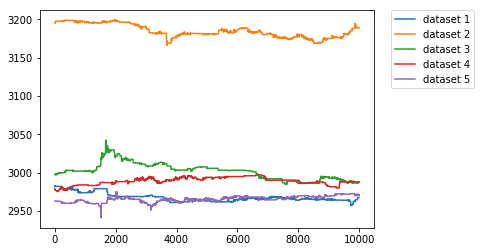

           dataset1      dataset2      dataset3      dataset4      dataset5
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean    2967.727636   3184.777591   3001.860442   2989.123599   2965.632773
std        5.399034      8.543964     10.635027      4.742169      3.893585
min     2957.185000   3166.020000   2984.895000   2975.435000   2941.015000
25%     2964.195000   3178.462500   2992.365000   2986.755000   2963.082500
50%     2966.115000   3182.225000   3002.935000   2989.825000   2965.485000
75%     2969.095000   3194.516250   3007.535000   2993.005000   2968.255000
max     2983.215000   3198.735000   3042.635000   2997.055000   2974.995000


In [18]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

prices1 = list(map(lambda x: float(x['price']), dataset1))
prices2 = list(map(lambda x: float(x['price']), dataset2))
prices3 = list(map(lambda x: float(x['price']), dataset3))
prices4 = list(map(lambda x: float(x['price']), dataset4))
prices5 = list(map(lambda x: float(x['price']), dataset5))

plt.plot(prices1, label="dataset 1")
plt.plot(prices2, label="dataset 2")
plt.plot(prices3, label="dataset 3")
plt.plot(prices4, label="dataset 4")
plt.plot(prices5, label="dataset 5")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

df = pd.DataFrame({'dataset1': prices1, 'dataset2': prices2, 'dataset3': prices3, 'dataset4': prices4, 'dataset5': prices5})
print (df.describe())
